In [ ]:
!wget https://he-s3.s3.amazonaws.com/media/hackathon/hackerearth-test-draft-1-106/predict-the-employee-attrition-rate-in-organizations-1d700a97/3f488f10aa3d11ea.zip

--2020-06-28 18:00:47--  https://he-s3.s3.amazonaws.com/media/hackathon/hackerearth-test-draft-1-106/predict-the-employee-attrition-rate-in-organizations-1d700a97/3f488f10aa3d11ea.zip
Resolving he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)... 52.219.124.80
Connecting to he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)|52.219.124.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 225523 (220K) [application/zip]
Saving to: ‘3f488f10aa3d11ea.zip’

3f488f10aa3d11ea.zi 100%[===================>] 220.24K  1.38MB/s    in 0.2s    

2020-06-28 18:00:48 (1.38 MB/s) - ‘3f488f10aa3d11ea.zip’ saved [225523/225523]



In [ ]:
!unzip 3f488f10aa3d11ea.zip

Archive:  3f488f10aa3d11ea.zip
   creating: Dataset/
  inflating: Dataset/Train.csv       
  inflating: Dataset/Test.csv        
  inflating: Dataset/sample_submission.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train = pd.read_csv('Dataset/Train.csv')
test = pd.read_csv('Dataset/Test.csv')

In [ ]:
train.head(5)

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [ ]:
test.tail(5)

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
2995,EID_22547,F,32.0,3,Single,Franklin,Sales,Directive,3.0,3,38,1,3,6.0,type2,2.0,1,-0.1048,0.7075,1.0,4,7,4
2996,EID_10066,F,NaN,2,Single,Franklin,Marketing,Conceptual,10.0,2,57,1,4,9.0,type2,1.0,3,0.7516,0.7075,3.0,4,8,3
2997,EID_7126,F,60.0,4,Single,Lebanon,Logistics,Analytical,35.0,1,69,0,2,9.0,type3,3.0,3,-1.8176,-0.4537,NaN,4,8,4
2998,EID_4929,F,51.0,1,Married,Springfield,IT,Behavioral,23.0,1,30,0,2,6.0,type3,1.0,5,0.7516,-0.4537,2.0,3,9,2
2999,EID_24750,F,45.0,1,Single,Franklin,Sales,Directive,12.0,4,70,1,2,8.0,type4,4.0,3,0.7516,-0.4537,2.0,2,8,5


In [ ]:
train.isnull().sum(),test.isnull().sum(),train.shape,test.shape,train.dtypes

(Employee_ID                    0
 Gender                         0
 Age                          412
 Education_Level                0
 Relationship_Status            0
 Hometown                       0
 Unit                           0
 Decision_skill_possess         0
 Time_of_service              144
 Time_since_promotion           0
 growth_rate                    0
 Travel_Rate                    0
 Post_Level                     0
 Pay_Scale                      9
 Compensation_and_Benefits      0
 Work_Life_balance             11
 VAR1                           0
 VAR2                         577
 VAR3                           0
 VAR4                         656
 VAR5                           0
 VAR6                           0
 VAR7                           0
 Attrition_rate                 0
 dtype: int64, Employee_ID                    0
 Gender                         0
 Age                          161
 Education_Level                0
 Relationship_Status            0


In [ ]:
train.nunique()

Employee_ID                  7000
Gender                          2
Age                            47
Education_Level                 5
Relationship_Status             2
Hometown                        5
Unit                           12
Decision_skill_possess          4
Time_of_service                44
Time_since_promotion            5
growth_rate                    55
Travel_Rate                     3
Post_Level                      5
Pay_Scale                      10
Compensation_and_Benefits       5
Work_Life_balance               5
VAR1                            5
VAR2                            5
VAR3                            5
VAR4                            3
VAR5                            5
VAR6                            5
VAR7                            5
Attrition_rate               3317
dtype: int64

In [ ]:
df=train.append(test,ignore_index=True)

In [ ]:
df['Work_Life_balance']=df['Work_Life_balance'].fillna(method='bfill')
df['VAR2']=df['VAR2'].fillna(method='bfill')
df['VAR4']=df['VAR4'].fillna(method='bfill')
df['Pay_Scale']=df['Pay_Scale'].fillna(method='bfill')

In [ ]:
a=['Age','Time_of_service']
for i in a:
  df[i]=df[i].fillna(df[i].mean())

In [ ]:
train = df[df['Attrition_rate'].isnull()==False]
test = df[df['Attrition_rate'].isnull()==True]

In [ ]:
del test['Attrition_rate']

In [ ]:
a=['Gender','Relationship_Status','Hometown','Unit','Decision_skill_possess','Compensation_and_Benefits']
for i in a:
  loc = np.append(train[i].values, test[i].values, axis=0)
  from sklearn.preprocessing import LabelEncoder
  l=LabelEncoder()
  l.fit(list(set(loc)))
  train[i]=l.transform(train[i])
  test[i]=l.transform(test[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
train_df=train

In [ ]:
del train_df['Employee_ID']

In [ ]:
X = train_df.drop(labels=['Attrition_rate'], axis=1)
y = train_df['Attrition_rate'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((5950, 22), (5950,), (1050, 22), (1050,))

In [ ]:
from math import sqrt 
from sklearn.metrics import mean_squared_log_error, mean_squared_error

In [ ]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_cv, label=y_cv)

param = {'objective': 'regression',
         'boosting': 'dart',  
         'metric': 'l2_root',
         'learning_rate': 0.01, 
         'num_iterations': 1000,
         'num_leaves': 69,
         'max_depth': -1,
         'min_data_in_leaf': 11,
         'bagging_fraction': 0.80,
         'bagging_freq': 1,
         'bagging_seed': 6,
         'feature_fraction': 0.80,
         'feature_fraction_seed': 2,
         'early_stopping_round': 200,
         'max_bin': 250
         }

lgbm = lgb.train(params=param, verbose_eval=100, train_set=train_data, valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(X_cv)
print('RMSE:', sqrt(mean_squared_error(y_cv, y_pred_lgbm)))

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid_0's rmse: 0.197083
[200]	valid_0's rmse: 0.19863
[300]	valid_0's rmse: 0.189984
[400]	valid_0's rmse: 0.18289
[500]	valid_0's rmse: 0.176889
[600]	valid_0's rmse: 0.175018
[700]	valid_0's rmse: 0.171605
[800]	valid_0's rmse: 0.169329
[900]	valid_0's rmse: 0.165841
[1000]	valid_0's rmse: 0.16369
RMSE: 0.16368995100901532


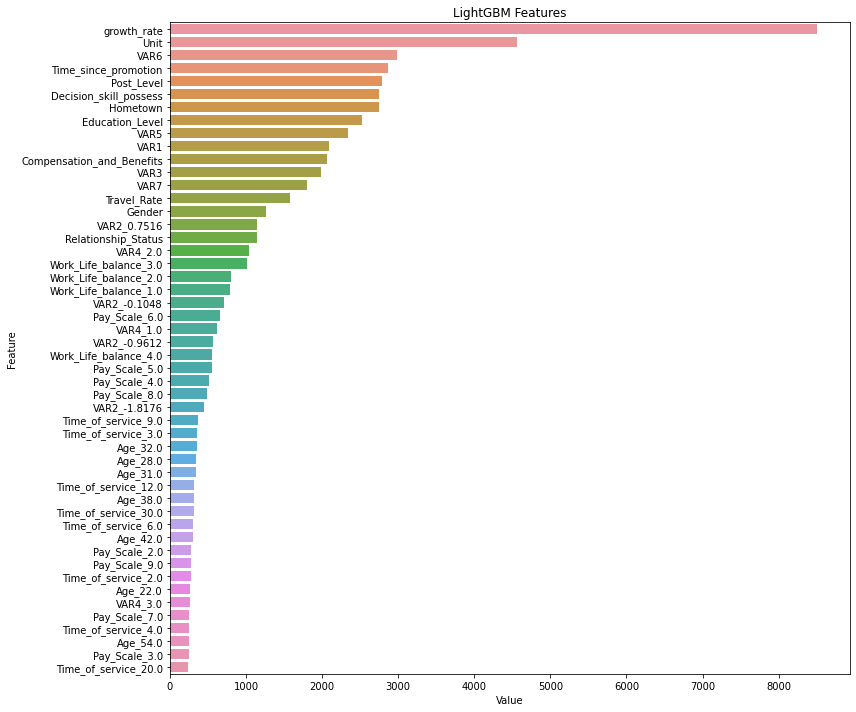

In [ ]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importance(), X.columns), reverse=True)[:50], 
                           columns=['Value','Feature'])
plt.figure(figsize=(12, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [ ]:
c=test['Employee_ID']
Xtest = test
del Xtest['Employee_ID']

In [ ]:
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor

errlgb = []
y_pred_totlgb = []

fold = KFold(n_splits=20, shuffle=True, random_state=2**30)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #lgbm = LGBMRegressor(**param)
    lgbm = LGBMRegressor(boosting_type='gbdt', num_leaves=300,random_state=2**30, max_depth=31, learning_rate=0.1, n_estimators=10000, min_child_samples=30, subsample=0.90,bagging_fraction=0.9)
    lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=200)

    y_pred_lgbm = lgbm.predict(X_test)
    print("RMSLE LGBM: ", sqrt(mean_squared_error(y_test,y_pred_lgbm)))

    errlgb.append(sqrt(mean_squared_error(y_test, y_pred_lgbm)))
    p = lgbm.predict(Xtest)
    y_pred_totlgb.append(p)

RMSLE LGBM:  0.19728352871494603
RMSLE LGBM:  0.19242865098202208
RMSLE LGBM:  0.19769163553694966
RMSLE LGBM:  0.20353652940764705
RMSLE LGBM:  0.18325805028628891
RMSLE LGBM:  0.1853792779024345
RMSLE LGBM:  0.17948813821799686
RMSLE LGBM:  0.17308962295657102
RMSLE LGBM:  0.17520252875769168
RMSLE LGBM:  0.19397148975735015
RMSLE LGBM:  0.18567179284109167
RMSLE LGBM:  0.19308956256650076
RMSLE LGBM:  0.18132489494949577
RMSLE LGBM:  0.1814193558633012
RMSLE LGBM:  0.16180446425393677
RMSLE LGBM:  0.19039616115018404
RMSLE LGBM:  0.17288452079892672
RMSLE LGBM:  0.17226085420806428
RMSLE LGBM:  0.19211892511842826
RMSLE LGBM:  0.19151886287541892


In [ ]:
100-np.mean(errlgb,0)*100

81.48090576427376

In [ ]:
lgbm_final = np.expm1(np.mean(y_pred_totlgb,0))
lgbm_final

array([0.22381122, 0.21667644, 0.21231918, ..., 0.19697486, 0.19602337,
       0.20164331])

In [ ]:
submission = pd.DataFrame({
        "Employee_ID": c,
        "Attrition_rate": lgbm_final
    })
submission.to_csv('./fin.csv', index=False)
print(submission)

     Employee_ID  Attrition_rate
7000   EID_22713        0.223811
7001    EID_9658        0.216676
7002   EID_22203        0.212319
7003    EID_7652        0.214328
7004    EID_6516        0.221178
...          ...             ...
9995   EID_22547        0.210963
9996   EID_10066        0.197179
9997    EID_7126        0.196975
9998    EID_4929        0.196023
9999   EID_24750        0.201643

[3000 rows x 2 columns]


In [ ]:
from google.colab import files
files.download('fin.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# New Section

In [ ]:
df=train.append(test,ignore_index=True)

In [ ]:
#df = pd.get_dummies(df, columns=['Age','Time_of_service','Pay_Scale','Work_Life_balance','VAR2','VAR4'])
df = pd.get_dummies(df, columns=['Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7'])

In [ ]:
train = df[df['Attrition_rate'].isnull()==False]
test = df[df['Attrition_rate'].isnull()==True]

In [ ]:
del test['Attrition_rate']

In [ ]:
a=['Gender','Relationship_Status','Hometown','Unit','Decision_skill_possess','Compensation_and_Benefits']
for i in a:
  loc = np.append(train[i].values, test[i].values, axis=0)
  from sklearn.preprocessing import LabelEncoder
  l=LabelEncoder()
  l.fit(list(set(loc)))
  train[i]=l.transform(train[i])
  test[i]=l.transform(test[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
train.head(2)

,Employee_ID,Attrition_rate,Gender_F,Gender_M,Age_19.0,Age_20.0,Age_21.0,Age_22.0,Age_23.0,Age_24.0,Age_25.0,Age_26.0,Age_27.0,Age_28.0,Age_29.0,Age_30.0,Age_31.0,Age_32.0,Age_33.0,Age_34.0,Age_35.0,Age_36.0,Age_37.0,Age_38.0,Age_39.0,Age_40.0,Age_41.0,Age_42.0,Age_43.0,Age_44.0,Age_45.0,Age_46.0,Age_47.0,Age_48.0,Age_49.0,Age_50.0,Age_51.0,Age_52.0,Age_53.0,Age_54.0,...,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4,Work_Life_balance_1.0,Work_Life_balance_2.0,Work_Life_balance_3.0,Work_Life_balance_4.0,Work_Life_balance_5.0,VAR1_1,VAR1_2,VAR1_3,VAR1_4,VAR1_5,VAR2_-1.8176,VAR2_-0.9612,VAR2_-0.1048,VAR2_0.7516,VAR2_1.6081,VAR3_-2.7762,VAR3_-1.615,VAR3_-0.4537,VAR3_0.7075,VAR3_1.8688,VAR4_1.0,VAR4_2.0,VAR4_3.0,VAR5_1,VAR5_2,VAR5_3,VAR5_4,VAR5_5,VAR6_5,VAR6_6,VAR6_7,VAR6_8,VAR6_9,VAR7_1,VAR7_2,VAR7_3,VAR7_4,VAR7_5
0,EID_23371,0.1841,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1,EID_18000,0.0670,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
train_df=train

In [ ]:
del train_df['Employee_ID']

In [ ]:
X = train_df.drop(labels=['Attrition_rate'], axis=1)
y = train_df['Attrition_rate'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((5250, 242), (5250,), (1750, 242), (1750,))

In [ ]:
from math import sqrt 
from sklearn.metrics import mean_squared_log_error, mean_squared_error

#gbm

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(verbose=1, learning_rate=0.01, n_estimators=500, random_state=42, subsample=0.9)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_cv)
print('RMSE', sqrt(mean_squared_error(y_cv, y_pred)))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.0342          -0.0000           10.76s
         2           0.0335          -0.0000           10.22s
         3           0.0339          -0.0000            9.88s
         4           0.0339           0.0000            9.60s
         5           0.0341          -0.0000            9.41s
         6           0.0343          -0.0000            9.57s
         7           0.0348           0.0000            9.55s
         8           0.0338           0.0000            9.45s
         9           0.0339           0.0000            9.35s
        10           0.0337           0.0000            9.26s
        20           0.0332           0.0000            8.80s
        30           0.0336          -0.0000            8.51s
        40           0.0336          -0.0000            8.30s
        50           0.0337          -0.0000            8.09s
        60           0.0341          -0.0000            7.88s
       

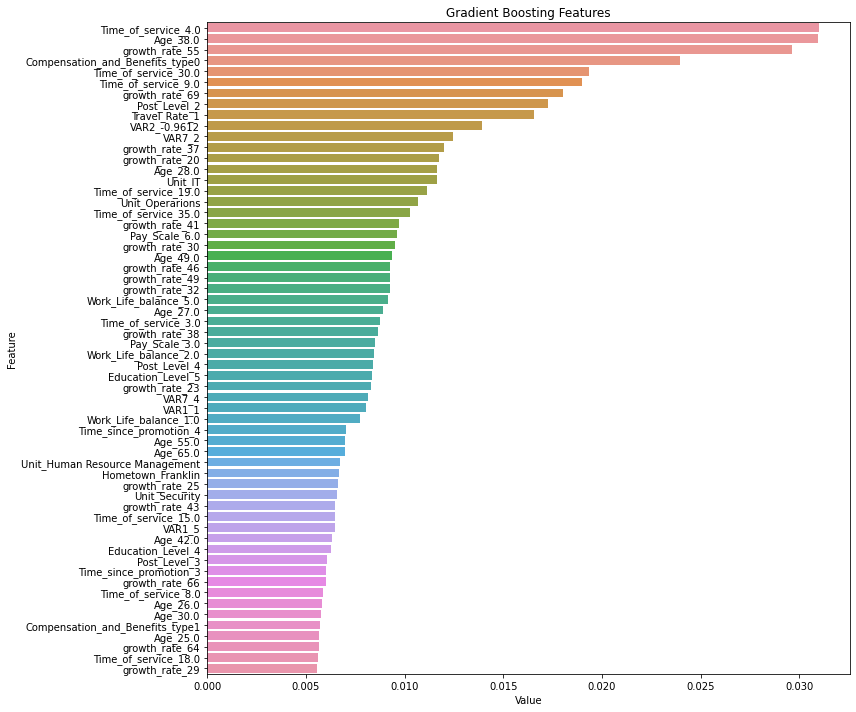

In [ ]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(gb.feature_importances_, X.columns), reverse=True)[:60], columns=['Value','Feature'])
plt.figure(figsize=(12,10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Gradient Boosting Features')
plt.tight_layout()
plt.show()

In [ ]:
c=test['Employee_ID']
Xtest = test
del Xtest['Employee_ID']

In [ ]:
from sklearn.model_selection import KFold

errgb = []
y_pred_totgb = []

fold = KFold(n_splits=10, shuffle=False, random_state=42)#42

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #gb = GradientBoostingRegressor(learning_rate=0.1, n_estimators=1000, random_state=42, subsample=0.9) #42        
    gb = GradientBoostingRegressor(learning_rate=0.01, n_estimators=1000, random_state=42, subsample=0.9)
    #gb = GradientBoostingRegressor(learning_rate=0.1, n_estimators=1000, random_state=42, subsample=0.8)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)

    print('RMSE', sqrt(mean_squared_error(y_test, y_pred)))

    errgb.append(sqrt(mean_squared_error(y_test, y_pred)))
    p = gb.predict(Xtest)
    y_pred_totgb.append(p)

RMSE 0.17792763363919953
RMSE 0.18453648661422806
RMSE 0.17470078217765742
RMSE 0.18770330545114258
RMSE 0.1944144392041953
RMSE 0.1816442692228442
RMSE 0.18443859898218434
RMSE 0.18377293383245477
RMSE 0.20901963287337597
RMSE 0.1895985371752619


In [ ]:
np.mean(errgb)

0.18677566191725442

In [ ]:
final = np.mean(y_pred_totgb,0)
final

array([0.22700139, 0.19534347, 0.16135898, ..., 0.14304158, 0.16164188,
       0.17424986])

In [ ]:
submission = pd.DataFrame({
        "Employee_ID": c,
        "Attrition_rate": final
    })
submission.to_csv('./fin.csv', index=False)
print(submission)

     Employee_ID  Attrition_rate
7000   EID_22713        0.227001
7001    EID_9658        0.195343
7002   EID_22203        0.161359
7003    EID_7652        0.206938
7004    EID_6516        0.206462
...          ...             ...
9995   EID_22547        0.224713
9996   EID_10066        0.171255
9997    EID_7126        0.143042
9998    EID_4929        0.161642
9999   EID_24750        0.174250

[3000 rows x 2 columns]


In [ ]:
from google.colab import files
files.download('fin.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install catboost

     |████████████████████████████████| 64.8MB 68kB/s 


In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [ ]:
from sklearn.model_selection import KFold

errgb = []
y_pred_totgb = []

fold = KFold(n_splits=10, shuffle=True, random_state=101)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
             
    gb = CatBoostRegressor(n_estimators=200, learning_rate=0.001, max_depth=16, rsm=0.5, verbose=500)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)

    print('RMSE', sqrt(mean_squared_error(y_test, y_pred)))

    errgb.append(sqrt(mean_squared_error(y_test, y_pred)))
    p = gb.predict(Xtest)
    y_pred_totgb.append(p)

0:	learn: 0.1858325	total: 454ms	remaining: 1m 30s
199:	learn: 0.1796518	total: 44.7s	remaining: 0us
RMSE 0.18452746403903325
0:	learn: 0.1880539	total: 202ms	remaining: 40.3s
199:	learn: 0.1817177	total: 44.4s	remaining: 0us
RMSE 0.16317545066128417
0:	learn: 0.1859531	total: 220ms	remaining: 43.9s


KeyboardInterrupt: ignored

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold

errxgb = []
y_pred_totxgb = []

fold = KFold(n_splits=15, shuffle=True, random_state=42)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    xgb = XGBRegressor(random_state=101)
    xgb.fit(X_train, y_train)

    y_pred_xgb = xgb.predict(X_test)
    print("RMSLE: ", sqrt(mean_squared_error(y_test, y_pred_xgb)))

    errxgb.append(sqrt(mean_squared_error(y_test,y_pred_xgb)))
    p = xgb.predict(Xtest)
    y_pred_totxgb.append(p)

[20:24:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSLE:  0.20746964603997317
[20:24:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSLE:  0.17611996739204408
[20:24:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSLE:  0.179298602469993
[20:24:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSLE:  0.19424265166622257
[20:24:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSLE:  0.2091817757705607
[20:24:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSLE:  0.18906319852527004
[20:24:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:l

In [ ]:
np.mean(errxgb)

0.18678458760820268

In [ ]:
final = np.mean(y_pred_totxgb,0)
final

array([1.7679182, 1.9216555, 2.7987022, ..., 1.5643302, 2.0260231,
       1.7948735], dtype=float32)